# **Visual Information Processing Lab**

# L1 Regularizers

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
os.chdir('/content/drive/My Drive/2021/MTech/Files/')
print(os.getcwd())

/content/drive/My Drive/2021/MTech/Files


### Datasets and Pre Processing

In [3]:
import keras
from keras.datasets import mnist

In [4]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
3
uint8
3
uint8
3
uint8


In [6]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [7]:
import numpy as np
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
9 9
0 0
33.318447
78.567444
2.8215446 2.8215446
-0.42407447 -0.42407447


In [8]:
xtrain = xtrain.reshape(xtrain.shape[0],28,28,1)
print(xtrain.shape)
xtest =  xtest.reshape(xtest.shape[0],28,28,1)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
from tensorflow.keras.utils import to_categorical
ytrain =  to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### LeNet Model

In [11]:
import keras
from keras import models
from keras import layers

In [12]:
from keras.regularizers import l1
import tensorflow as tf

In [13]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(28,28,1), activation='relu', strides=(1,1), padding='valid',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(layers.Dense(84, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01)))

model.add(layers.Dense(10, activation='softmax',kernel_regularizer=tf.keras.regularizers.l1(0.01)))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

### Compile and Training the model

In [14]:
os.chdir('/content/drive/My Drive/2021/MTech/Weights/')

print(os.getcwd())

from keras.callbacks import ModelCheckpoint,CSVLogger
mc = ModelCheckpoint('CNN_MNIST.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

cv = keras.callbacks.CSVLogger('CNN_MNIST.csv', separator=',', append=False)

/content/drive/My Drive/2021/MTech/Weights


In [15]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256, callbacks= [mc,cv],epochs=25, verbose=1)

Epoch 1/25
188/188 [==============================] - ETA: 0s - loss: 28.8126 - accuracy: 0.3314
Epoch 00001: val_loss improved from inf to 24.42708, saving model to CNN_MNIST.h5
188/188 [==============================] - 12s 15ms/step - loss: 28.8126 - accuracy: 0.3314 - val_loss: 24.4271 - val_accuracy: 0.6839
Epoch 2/25
182/188 [============================>.] - ETA: 0s - loss: 20.7601 - accuracy: 0.7888
Epoch 00002: val_loss improved from 24.42708 to 17.38568, saving model to CNN_MNIST.h5
188/188 [==============================] - 2s 10ms/step - loss: 20.6647 - accuracy: 0.7902 - val_loss: 17.3857 - val_accuracy: 0.8238
Epoch 3/25
186/188 [============================>.] - ETA: 0s - loss: 14.7055 - accuracy: 0.8423
Epoch 00003: val_loss improved from 17.38568 to 12.11929, saving model to CNN_MNIST.h5
188/188 [==============================] - 2s 10ms/step - loss: 14.6853 - accuracy: 0.8424 - val_loss: 12.1193 - val_accuracy: 0.8560
Epoch 4/25
188/188 [==============================

### Evaluate

In [16]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 4ms/step - loss: 1.0920 - accuracy: 0.8654


[1.092010259628296, 0.8654000163078308]

### Prediction

In [ ]:
pred=model.predict(xtest[0].reshape(1,28,28,1))
print(pred)
print(pred.argmax())

[[7.0840825e-04 2.7399169e-06 3.3215410e-04 4.4204192e-03 8.1285994e-05
  9.8195614e-04 1.9348488e-06 9.8396134e-01 2.0226034e-04 9.3074944e-03]]
7


In [ ]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.9910 - accuracy: 0.8870
0.9909968972206116
0.8870000243186951


### Loss and Accuracy Curves

In [ ]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

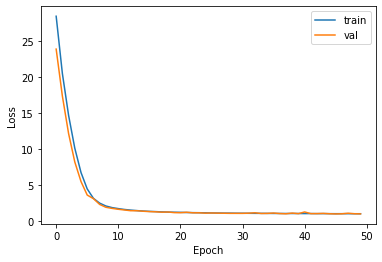

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

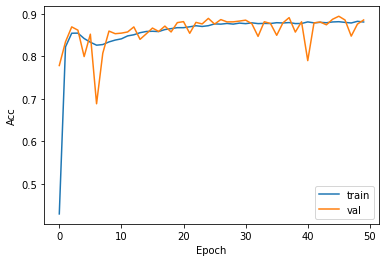

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])